In [ ]:
To generate multivariate synthetic data with different distributions using a covariance matrix, we can follow these steps:

    1-Define the covariance matrix that describes the correlations between the variables.
    2-Perform Cholesky decomposition on the covariance matrix to obtain the lower triangular matrix L.
    3- Generate samples from the standard normal distribution, which is a standard normal distribution with mean 0 and standard deviation 1.
    4- Transform the standard normal samples into the desired distributions using inverse transform sampling or other methods.
    5- Apply the Cholesky decomposition to the transformed samples to make them correlated.
    6- Apply means and standard deviations to the correlated samples to get the final synthetic data.

Here's an example of how to generate 4 variable synthetic data using different distributions:

In [9]:
import numpy as np
from scipy.stats import norm, lognorm, beta, uniform
import scipy


In [16]:
# define the covariance matrix
cov = np.array([[ 5 , 2 , 1 , 3 ],
[ 2 , 6 , 2 , 1 ],
[ 1  ,2 , 7 ,-1 ],
[ 3 , 1 ,-1 , 8 ]
])

In [18]:
cov

array([[ 5,  2,  1,  3],
       [ 2,  6,  2,  1],
       [ 1,  2,  7, -1],
       [ 3,  1, -1,  8]])

In [19]:
# perform Cholesky decomposition on the covariance matrix
L = np.linalg.cholesky(cov)

In [20]:
# generate samples from the standard normal distribution
n_samples = 1000
n_variables = 4
samples = np.random.randn(n_variables, n_samples)

In [21]:
# transform the standard normal samples into the desired distributions
for i in range(n_variables):
    if i == 0:
        # for the first variable, keep it normal
        transformed = samples[i]
    elif i == 1:
        # for the second variable, transform to lognormal distribution
        transformed = lognorm.ppf(norm.cdf(samples[i]), s=1, scale=10)
    elif i == 2:
        # for the third variable, transform to beta distribution
        transformed = beta.ppf(norm.cdf(samples[i]), a=2, b=5, loc=0, scale=1)
    else:
        # for the fourth variable, transform to uniform distribution
        transformed = uniform.ppf(norm.cdf(samples[i]), loc=1, scale=3)
    samples[i] = transformed

In [22]:
# apply the Cholesky decomposition to the transformed samples
correlated_samples = np.dot(L, samples)

In [24]:
correlated_samples

array([[ 3.76856021e+00,  1.41957827e+00, -4.50530479e+00, ...,
        -9.10797447e-01, -9.35689237e-01, -2.70562106e-01],
       [ 1.30920448e+01,  1.20740682e+02,  6.53522125e+01, ...,
         6.25379921e+00,  4.62200850e+01,  1.23533578e+01],
       [ 4.63054129e+00,  3.73801529e+01,  2.07426841e+01, ...,
         2.04374073e+00,  1.43522931e+01,  4.69279137e+00],
       [ 8.67192970e+00,  1.07482815e-01,  3.01266151e+00, ...,
         4.41131701e+00,  2.99168897e-01,  4.36293828e+00]])

# Multivariate RV generation

In [82]:
import numpy as np
from scipy.stats import lognorm, beta

In [83]:
# Let's start with three variables x1,x2,x3 and choose the distributions for each variable
# Assume variable x1 has normal distribution which parameters are mean and variance
mu_x1, sigma_x1 = 2, 1
# Assume variable x2 has normal distribution which parameters are mean and variance
#lambda_x2 = 1
mu_x2, sigma_x2= 5,2
# Assume variable x2 has uniform distribution which parameters are  -∞< a, b < ∞
a_x3, b_x3 = 3, 5

In [84]:
# Generate random samples from each distribution
n = 1000
x1 = np.random.normal(mu_x1, sigma_x1, n)  #  ---> Normal dist
#x2 = np.random.exponential(1/lambda_x2, n) #  ---> Exponential dist
x2 = np.random.normal(mu_x2, sigma_x2, n)
x3 = np.random.uniform(a_x3, b_x3, n)      #  ---> Uniform dist

In [95]:
# Calculate the correlation matrix 
#R = np.corrcoef(np.array([x1, x2, x3]))
R=[[ 1.0 ,  0.5 ,  0.3 ],
[ 0.5,  1.0 ,  0.7 ],
[ 0.3 , 0.7  , 1.0 ]]


In [96]:
# Calculate the Cholesky decomposition 
L = np.linalg.cholesky(R)

In [97]:
# Generate random standard normal variables (we generate random normal 3 variables to be able to transfer to desired distribution)
u = np.random.normal(0, 1, (3, n))

In [98]:
# Generate correlated random variables ( we multiply the generated normal variables with the lower triangle of the decomposed correlation)
z = np.dot(L, u)

In [99]:
from numpy.random.mtrand import lognormal
# Transform the correlated random variables into the desired distributions
X = mu_x1 + sigma_x1*z[0]
#Y = -np.log(1 - z[1])/lambda_x2
#Y=mu_x2-beta_x2*(np.log(-np.log(z[1])))
#Y=lognorm.ppf(z[1],mu_x2,sigma_x2)

Y = mu_x2 + sigma_x2*z[1]
Z = a_x3 + (b_x3 - a_x3)*z[2]

In [100]:
ro=np.array([X,Y,Z])

In [101]:
ro=ro[:,~np.isnan(ro).any(axis=0)]

In [102]:
ro.shape

(3, 1000)

In [103]:
Xm,Ym,Zm=ro[0],ro[1],ro[2]

In [104]:
# Print the correlation coefficients
print('Correlation coefficients:')
print(np.array(R))

# Print the correlation between the transformed variables
print('Correlation between transformed variables:')
print(np.corrcoef(np.array([Xm, Ym, Zm])))

Correlation coefficients:
[[1.  0.5 0.3]
 [0.5 1.  0.7]
 [0.3 0.7 1. ]]
Correlation between transformed variables:
[[1.         0.48883414 0.26601574]
 [0.48883414 1.         0.68119951]
 [0.26601574 0.68119951 1.        ]]


In [106]:
Xm.mean(),Xm.std(),

(2.0171153789974583, 0.974819327934198)

# Gaussian **Copula**

In [381]:
from copulae.datasets import load_residuals

residuals = load_residuals()
residuals.head()



,A,B,C,D,E,F,G
0,0.730967,0.530860,0.287320,1.193049,0.019040,1.100507,0.278214
1,2.067853,-1.181313,-2.546173,0.381538,-0.038734,0.269874,-0.603940
2,-2.181835,0.380326,0.928632,-0.316861,0.106473,-0.324854,-0.447824
3,0.445040,0.734531,-0.133299,-0.374091,0.173616,-0.319402,-0.775106
4,0.296363,3.024053,0.815791,1.168521,0.134044,1.110424,1.705190


In [392]:
import seaborn as sns

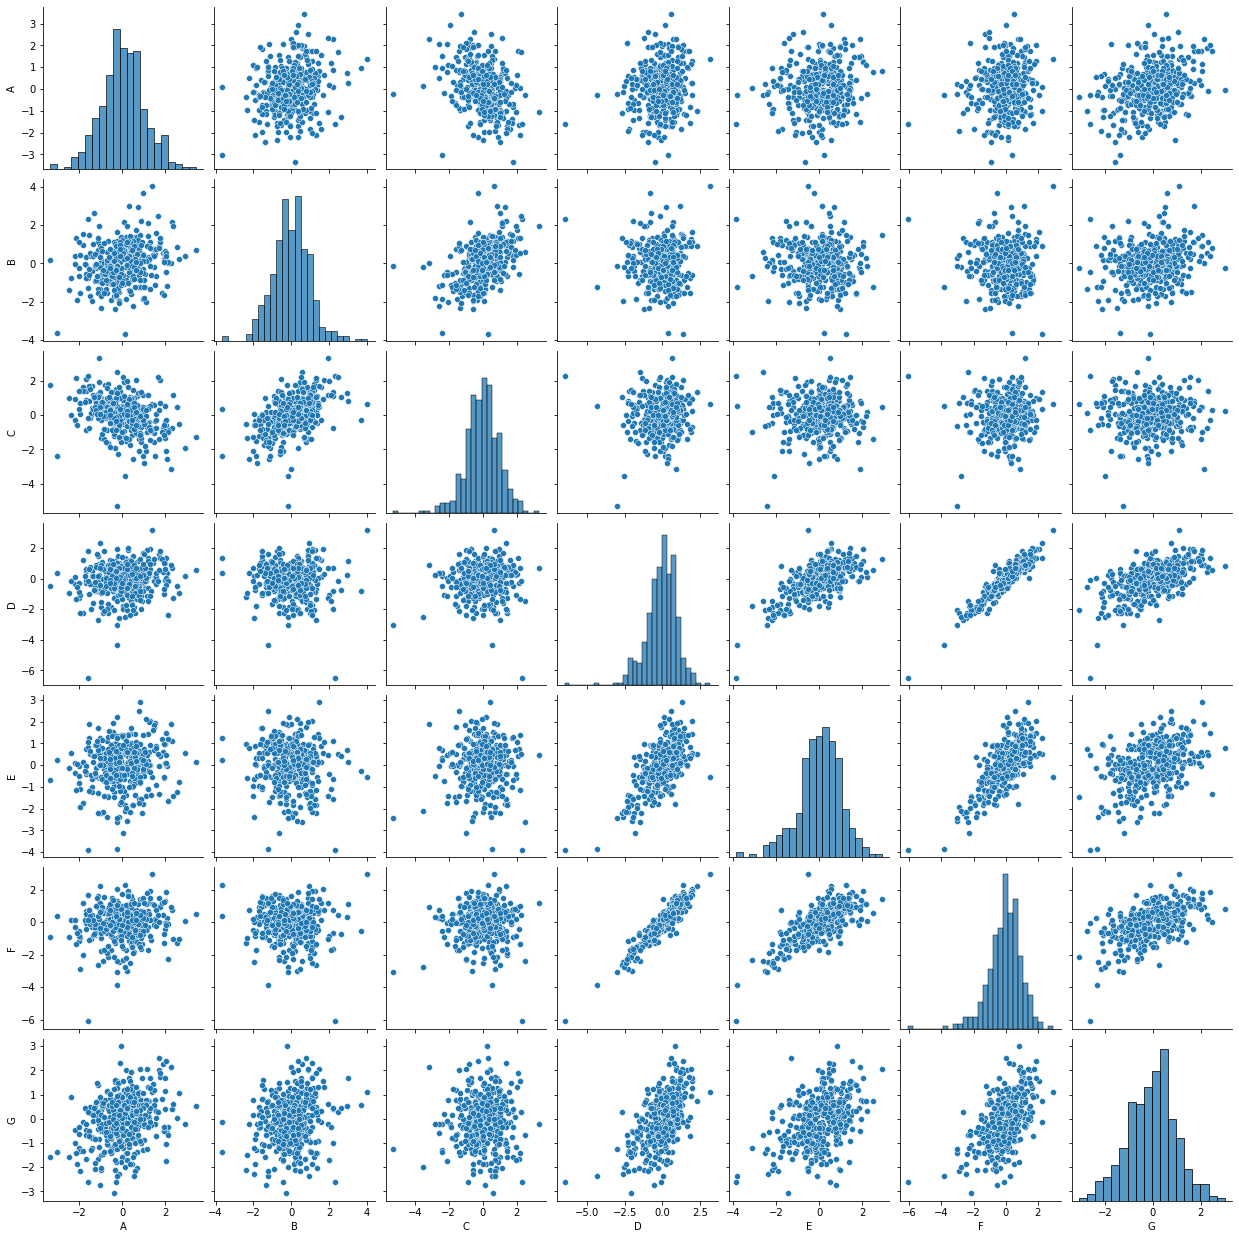

In [393]:
sns.pairplot(residuals)

In [383]:
from copulae import GaussianCopula

_, ndim = residuals.shape
g_cop = GaussianCopula(dim=ndim)  # initializing the copula
g_cop.fit(residuals)  # fit the copula to the data

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


                A           B           C           D           E           F  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     0.500000    0.500000    0.500000    0.500000    0.500000    0.500000   
std      0.288309    0.288309    0.288309    0.288309    0.288309    0.288309   
min      0.002532    0.002532    0.002532    0.002532    0.002532    0.002532   
25%      0.251266    0.251266    0.251266    0.251266    0.251266    0.251266   
50%      0.500000    0.500000    0.500000    0.500000    0.500000    0.500000   
75%      0.748734    0.748734    0.748734    0.748734    0.748734    0.748734   
max      0.997468    0.997468    0.997468    0.997468    0.997468    0.997468   

                G  
count  394.000000  
mean     0.500000  
std      0.288309  
min      0.002532  
25%      0.251266  
50%      0.500000  
75%      0.748734  
max      0.997468  


In [384]:
g_cop.summary()

1.000000,0.191081,-0.365944,0.128204,0.128853,0.110536,0.309972
0.191081,1.000000,0.512683,-0.027041,-0.082239,-0.032021,0.207898
-0.365944,0.512683,1.000000,0.058283,-0.006468,0.055127,0.010648
0.128204,-0.027041,0.058283,1.000000,0.624116,0.936115,0.590101
0.128853,-0.082239,-0.006468,0.624116,1.000000,0.711072,0.416072
0.110536,-0.032021,0.055127,0.936115,0.711072,1.000000,0.562437
0.309972,0.207898,0.010648,0.590101,0.416072,0.562437,1.000000


In [387]:
import numpy as np

random_matrix = np.random.uniform(0, 1, size=(2, 7))

pdf = g_cop.pdf(random_matrix)  # length 2 ndarray
cdf = g_cop.cdf(random_matrix)  # length 2 ndarray
rv = g_cop.random(1000)  # shape is 2 by 7.



In [388]:
rv

,A,B,C,D,E,F,G
0,0.483804,0.420652,0.201007,0.482047,0.527322,0.491364,0.480464
1,0.009726,0.264165,0.692887,0.592310,0.394515,0.679977,0.250384
2,0.244037,0.577872,0.494996,0.326555,0.136325,0.257782,0.409031
3,0.322258,0.834795,0.756016,0.334237,0.208105,0.178899,0.156111
4,0.243387,0.112934,0.026536,0.430129,0.498980,0.361806,0.341831
...,...,...,...,...,...,...,...
995,0.014997,0.336322,0.932653,0.812433,0.841237,0.833520,0.130405
996,0.946184,0.879641,0.349307,0.942413,0.759640,0.898065,0.832078
997,0.726998,0.520604,0.480738,0.145857,0.070829,0.128206,0.244208
998,0.736025,0.387775,0.404850,0.603568,0.611504,0.691833,0.742451


In [391]:
rv.corr()

,A,B,C,D,E,F,G
A,1.000000,0.173139,-0.376032,0.174700,0.175737,0.165300,0.317194
B,0.173139,1.000000,0.493573,-0.007078,-0.069841,-0.002845,0.212216
C,-0.376032,0.493573,1.000000,0.019999,-0.051261,0.017906,0.000080
D,0.174700,-0.007078,0.019999,1.000000,0.644887,0.931600,0.604399
E,0.175737,-0.069841,-0.051261,0.644887,1.000000,0.729932,0.416581
F,0.165300,-0.002845,0.017906,0.931600,0.729932,1.000000,0.571005
G,0.317194,0.212216,0.000080,0.604399,0.416581,0.571005,1.000000


In [379]:
from copulae import NormalCopula
import numpy as np

np.random.seed(8)
data = np.random.normal(size=(300, 8))
cop = NormalCopula(8)
cop.fit(data)

cop.random(10)  # simulate random number

# getting parameters
p = cop.params
# cop.params = ...  # you can override parameters too, even after it's fitted!  

# get a summary of the copula. If it's fitted, fit details will be present too
cop.summary()

# overriding parameters, for Elliptical Copulae, you can override the correlation matrix
cop[:] = np.eye(8)  # in this case, this will be equivalent to an Independent Copula


In [380]:
cop

In [378]:
import numpy as np
from scipy.stats import norm, gamma
from copulae import GaussianCopula

# Define correlation matrix and mean values
corr_matrix = np.array([[1.0, 0.6, 0.2], [0.6, 1.0, 0.4], [0.2, 0.4, 1.0]])
means = np.array([2.0, 3.0, 4.0])

# Generate correlated random variables with uniform marginals
n_samples = 1000
X = np.random.multivariate_normal(np.zeros(3), corr_matrix, size=n_samples)

# Apply inverse CDF of desired marginals
Y = np.zeros_like(X)
Y[:, 0] = norm.ppf(norm.cdf(X[:, 0]), loc=means[0], scale=1.5)
Y[:, 1] = gamma.ppf(norm.cdf(X[:, 1]), a=2, loc=means[1], scale=0.5)
Y[:, 2] = norm.ppf(norm.cdf(X[:, 2]), loc=means[2], scale=2.0)

# Use copula to link transformed variables
copula = GaussianCopula(dim=3)
U = copula

# Generate random samples from joint distribution
samples = np.zeros_like(U)
samples[:, 0] = norm.ppf(U[:, 0], loc=means[0], scale=1.5)
samples[:, 1] = gamma.ppf(U[:, 1], a=2, loc=means[1], scale=0.5)
samples[:, 2] = norm.ppf(U[:, 2], loc=means[2], scale=2.0)

# Check the correlation and marginal distributions
print(np.corrcoef(samples.T))
print(np.mean(samples[:, 0]))
print(np.var(samples[:, 0]))
print(np.mean(samples[:, 1]))
print(np.var(samples[:, 1]))
print(np.mean(samples[:, 2]))
print(np.var(samples[:, 2]))


IndexError: ignored

In [204]:
import numpy as np

# Choose the distributions for each variable
mu_x, sigma_x = 0, 1
lambda_y = 0.5
a_z, b_z = 0, 1

# Generate random samples from each distribution
n = 1000
x = np.random.normal(mu_x, sigma_x, n)
y = np.random.exponential(1/lambda_y, n)
z = np.random.uniform(a_z, b_z, n)

# Calculate the correlation matrix
R = np.corrcoef(np.array([x, y, z]))

# Calculate the Cholesky decomposition
L = np.linalg.cholesky(R)

# Generate random standard normal variables
u = np.random.normal(0, 1, (3, n))

# Generate correlated random variables
z = np.dot(L, u)

# Transform the correlated random variables into the desired distributions
X = mu_x + sigma_x*z[0]
Y = -np.log(1 - z[1])/lambda_y
Z = a_z + (b_z - a_z)*z[2]

# Print the correlation coefficients
print('Correlation coefficients:')
print(R)

# Print the correlation between the transformed variables
print('Correlation between transformed variables:')
print(np.corrcoef(np.array([X, Y, Z])))

Correlation coefficients:
[[ 1.         -0.05871179  0.00294494]
 [-0.05871179  1.         -0.00971004]
 [ 0.00294494 -0.00971004  1.        ]]
Correlation between transformed variables:
[[1.                nan 0.00936323]
 [       nan        nan        nan]
 [0.00936323        nan 1.        ]]


<ipython-input-204-0353fee1f150>:28: RuntimeWarning: invalid value encountered in log
  Y = -np.log(1 - z[1])/lambda_y


In [1]:
# NATAF

import numpy as np
from scipy.stats import norm

# Define the correlation matrix
corr_mat = np.array([[1.0, 0.5, 0.3, 0.2],
                     [0.5, 1.0, 0.4, 0.1],
                     [0.3, 0.4, 1.0, 0.6],
                     [0.2, 0.1, 0.6, 1.0]])

# Define the mean vector
mean_vec = np.array([2.0, 1.5, 3.0, 2.5])

# Define the standard deviation vector
std_vec = np.array([0.5, 0.6, 0.7, 0.8])

# Define the joint distribution function
def joint_distribution(x):
    return norm.cdf(x, loc=mean_vec, scale=std_vec)

# Define the inverse joint distribution function
def inverse_joint_distribution(x):
    return norm.ppf(x, loc=mean_vec, scale=std_vec)

# Define the Nataf transformation function
def nataf_transform(x):
    # Calculate the correlation matrix's Cholesky decomposition
    L = np.linalg.cholesky(corr_mat)
    
    # Transform the input vector to the standard normal space
    z = np.linalg.solve(L, x - mean_vec)
    
    # Calculate the correlation matrix's determinant
    det = np.linalg.det(corr_mat)
    
    # Calculate the transformed vector
    y = inverse_joint_distribution(joint_distribution(z) * (1 / np.sqrt(det)))
    
    return y

# Example usage
x = np.array([2.3, 1.7, 3.2, 2.8])
y = nataf_transform(x)

print("Original vector:", x)
print("Transformed vector:", y)


Original vector: [2.3 1.7 3.2 2.8]
Transformed vector: [0.36796137 0.16823485 0.18208609 0.35746991]


In [16]:
import numpy as np
from scipy.stats import norm

# Define the correlation matrix
corr_mat = np.array([[1.0, 0.5, 0.3, 0.2],
                     [0.5, 1.0, 0.4, 0.1],
                     [0.3, 0.4, 1.0, 0.6],
                     [0.2, 0.1, 0.6, 1.0]])

# Define the mean vector
mean_vec = np.array([2.0, 1.5, 3.0, 2.5])

# Define the standard deviation vector
std_vec = np.array([0.5, 0.6, 0.7, 0.8])

# Define the joint distribution function
def joint_distribution(x):
    return norm.cdf(x, loc=mean_vec, scale=std_vec)

# Define the inverse joint distribution function
def inverse_joint_distribution(x):
    return norm.ppf(x, loc=mean_vec, scale=std_vec)

# Define the Nataf transformation function
def nataf_transform(x):
    # Calculate the correlation matrix's Cholesky decomposition
    L = np.linalg.cholesky(corr_mat)
    
    # Transform the input vector to the standard normal space
    z = np.linalg.solve(L, x - mean_vec)
    
    # Calculate the correlation matrix's determinant
    det = np.linalg.det(corr_mat)
    
    # Calculate the transformed vector
    y = inverse_joint_distribution(joint_distribution(z) * (1 / np.sqrt(det)))
    
    return y

# Generate synthetic data using the Nataf transformation
n_samples = 2000

# Generate random samples in the standard normal space
z_samples = np.random.randn(n_samples, 4)

# Transform the samples using the Nataf transformation
x_samples = np.zeros((n_samples, 4))
for i in range(n_samples):
    x_samples[i] = nataf_transform(z_samples[i])

# Print the first 10 samples
print(x_samples[:10])


[[-2.36308439 -0.43845157 -2.39865515  0.19308358]
 [-0.87739474  0.11832745 -2.3994839   0.51631926]
 [-2.45262887  0.78810751 -2.05485473  0.48987067]
 [-2.02359632 -2.4101217  -1.52972331  0.10640119]
 [-1.48834395 -1.51927558 -1.72930398 -1.06053451]
 [-2.7040362   0.64814507 -3.02576874 -3.00493105]
 [-0.73113546  0.14193104 -0.9852167  -2.58876129]
 [-3.71735475  0.43596185 -2.31550638  0.4432784 ]
 [-1.73305298  0.84218838 -3.55774607  0.33595612]
 [-4.02254904 -0.97747979 -1.46350756 -1.20814679]]


In [ ]:
# NaTaf for 
import numpy as np
from scipy.stats import norm, lognorm, expon, chi2, uniform

# Define the correlation matrix
corr_mat = np.array([[1.0, 0.5, 0.3, 0.2, -0.1],
                     [0.5, 1.0, 0.4, 0.1, -0.2],
                     [0.3, 0.4, 1.0, 0.6, 0.2],
                     [0.2, 0.1, 0.6, 1.0, -0.3],
                     [-0.1, -0.2, 0.2, -0.3, 1.0]])

# Define the mean vector
mean_vec = np.array([2.0, 1.5, 3.0, 2.5, 1.0])

# Define the standard deviation vector
std_vec = np.array([0.5, 0.6, 0.7, 0.8, 0.9])

# Define the joint distribution function
def joint_distribution(x):
    y1 = norm.cdf(x[0], loc=mean_vec[0], scale=std_vec[0])
    y2 = lognorm.cdf(x[1], s=std_vec[1], scale=np.exp(mean_vec[1]))
    y3 = expon.cdf(x[2], scale=mean_vec[2])
    y4 = chi2.cdf(x[3], df=mean_vec[3])
    y5 = uniform.cdf(x[4], loc=mean_vec[4] - np.sqrt(3)*std_vec[4], scale=2*np.sqrt(3)*std_vec[4])
    return np.array([y1, y2, y3, y4, y5])

# Define the inverse joint distribution function
def inverse_joint_distribution(x):
    y1 = norm.ppf(x[0], loc=mean_vec[0], scale=std_vec[0])
    y2 = lognorm.ppf(x[1], s=std_vec[1], scale=np.exp(mean_vec[1]))
    y3 = expon.ppf(x[2], scale=mean_vec[2])
    y4 = chi2.ppf(x[3], df=mean_vec[3])
    y5 = uniform.ppf(x[4], loc=mean_vec[4] - np.sqrt(3)*std_vec[4], scale=2*np.sqrt(3)*std_vec[4])
    return np.array([y1, y2, y3, y4, y5])

# Define the Nataf transformation function
def nataf_transform(x):
    # Calculate the correlation matrix's Cholesky decomposition
    L = np.linalg.cholesky(corr_mat)
    
    # Transform the input vector to the standard normal space
    z = np.linalg.solve(L, x - mean_vec)
    
    # Calculate the correlation matrix's determinant
    det = np.linalg.det(corr_mat)
    
    # Calculate the transformed vector
    y = inverse_joint_distribution(joint_distribution(z) * (1 / np.sqrt(det)))
    
    return y

# Generate synthetic data using the Nataf transformation
n_samples = 10000

# Generate random samples in the standard normal space
z_samples = np.random.randn(n_samples, 5)

# Transform the samples using the Nataf transformation
x_samples = np.zeros((n_samples, 5))
for i in range(n_samples):
    x_samples[i] = nataf_transform(z_samples[i])

# Print the first 10 samples
print(x_samples[:10])

In [113]:
!pip install copulae

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.0 MB/s eta 0:00:00


In [118]:
pip install copulas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 4.1 MB/s eta 0:00:00


In [119]:
import numpy as np
from scipy.stats import norm, lognorm, beta, uniform
import copulae
from copulae import NatafCopula

# Define the marginal distributions for each variable
marginals = [
    norm(0, 1),   # standard normal distribution
    lognorm(1, 0, np.exp(1)),   # log-normal distribution
    beta(2, 5),   # beta distribution
    uniform(0, 1),   # uniform distribution
    norm(0, 1)   # standard normal distribution
]

# Define the correlation matrix for the variables
corr = np.array([
    [1.0, 0.4, -0.2, 0.0, 0.2],
    [0.4, 1.0, 0.0, -0.3, -0.1],
    [-0.2, 0.0, 1.0, 0.0, 0.5],
    [0.0, -0.3, 0.0, 1.0, -0.1],
    [0.2, -0.1, 0.5, -0.1, 1.0]
])

# Create a NatafCopula object and generate the synthetic data using the multivariate NATAF method
nataf = NatafCopula(marginals, corr)
synthetic_data_nataf = nataf.sample(1000)

# Create a Cholesky decomposition of the correlation matrix
cholesky = np.linalg.cholesky(corr)

# Generate random samples from the standard normal distribution
norm_samples = norm(0, 1).rvs(size=(1000, 5))

# Transform the standard normal samples using the Cholesky decomposition
transformed_samples = np.dot(norm_samples, cholesky)

# Apply the inverse CDFs of the marginal distributions to the transformed samples
synthetic_data_cholesky = np.array([[
    marginals[i].ppf(norm.cdf(transformed_samples[j, i]))
    for i in range(5)]
    for j in range(1000)])

# Print the first 5 rows of the synthetic data generated using the multivariate NATAF method
print(synthetic_data_nataf[:5])

# Print the first 5 rows of the synthetic data generated using the Cholesky method
print(synthetic_data_cholesky[:5])


ImportError: ignored